In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv')

In [ ]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [ ]:
y.head()

,Unnamed: 0,0
0,0,101.159902
1,1,78.442913
2,2,-159.238195
3,3,120.719533
4,4,2.920673


In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

In [ ]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [ ]:
y.head()

0    101.159902
1     78.442913
2   -159.238195
3    120.719533
4      2.920673
Name: 0, dtype: float64

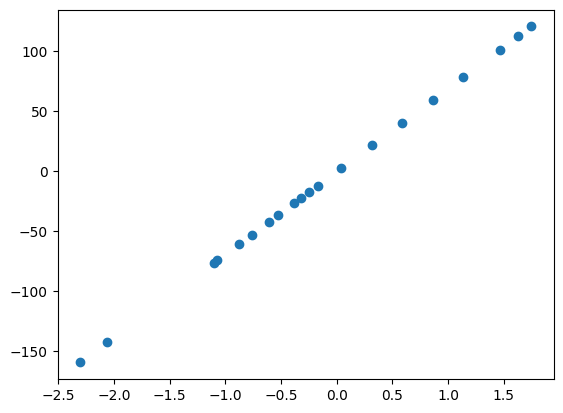

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""

    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def fit(self, X, Y):
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [ ]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153406


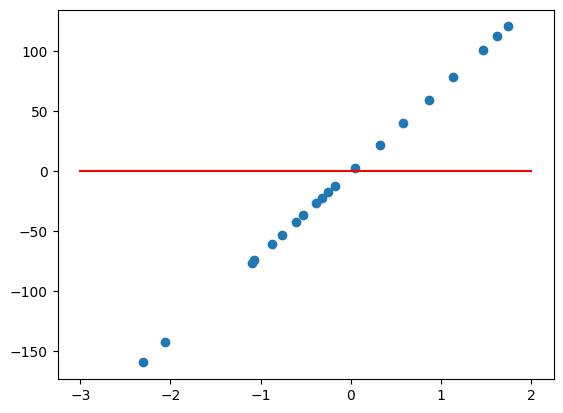

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [ ]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2253.7456808918546


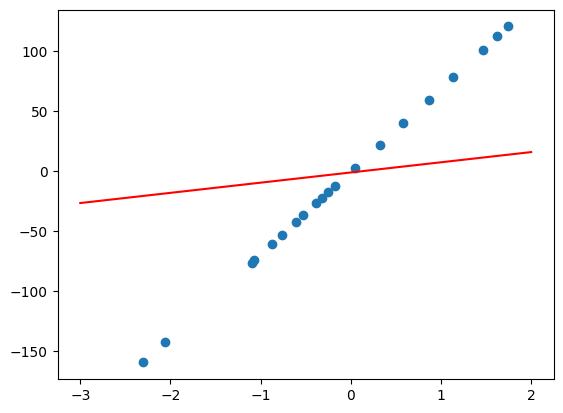

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0 = 0, b1 = 0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10_000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.776975306057215e-06


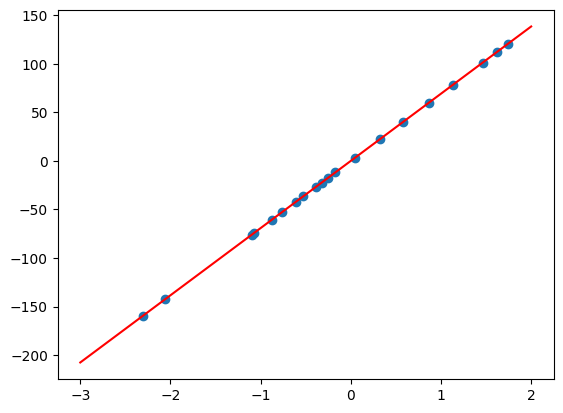

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

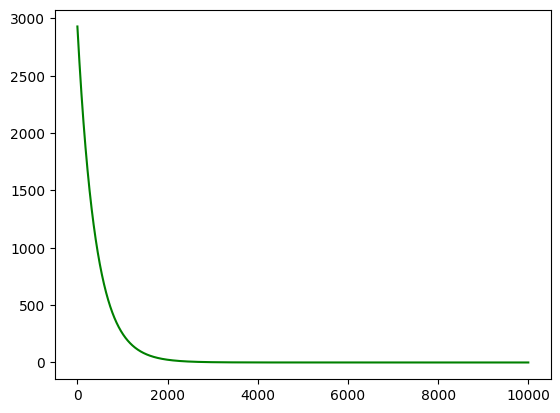

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

**Задания для самостоятельного выполнения**

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму


In [ ]:
betas = [tuple([np.random.normal(0, 10), np.random.normal(0, 10)]) for _ in range(10)]
betas

[(5.274068838016097, -13.325177824644301),
 (7.09969818251032, 0.007573188040707461),
 (1.4646834876568573, 2.325294912173791),
 (-6.704483295684032, 6.879342935757011),
 (-7.93890218947237, -14.241204951393453),
 (-10.088249838338776, 0.08041079320870823),
 (2.994988993556416, -4.504994868656668),
 (-9.67780171235556, 5.805839728888986),
 (-0.7608454044123013, -6.8815556739147485),
 (-3.3933113244256212, 15.299797582354074)]

b_0 :  5.274068838016097  b_1 :  -13.325177824644301
error after gradient descent: 2.9387551243534126e-06


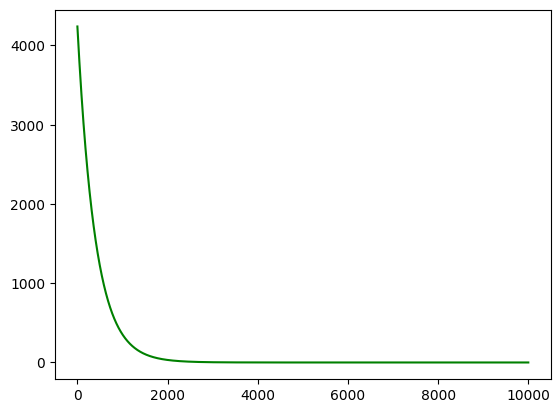

b_0 :  7.09969818251032  b_1 :  0.007573188040707461
error after gradient descent: 1.6869230628082182e-06


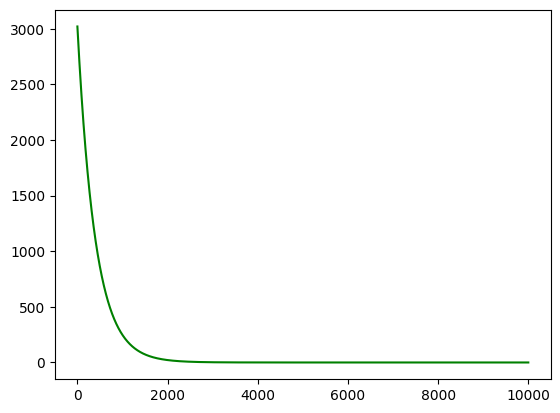

b_0 :  1.4646834876568573  b_1 :  2.325294912173791
error after gradient descent: 2.3548226050391236e-06


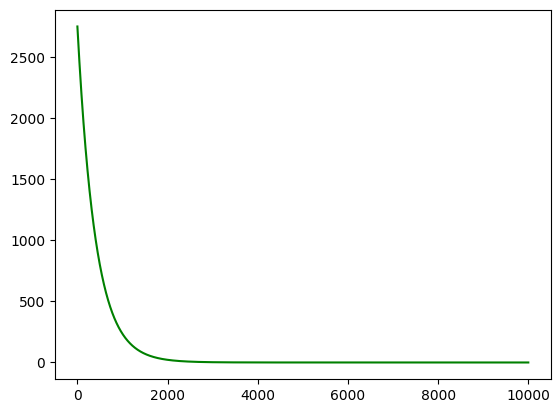

b_0 :  -6.704483295684032  b_1 :  6.879342935757011
error after gradient descent: 3.416599453480031e-06


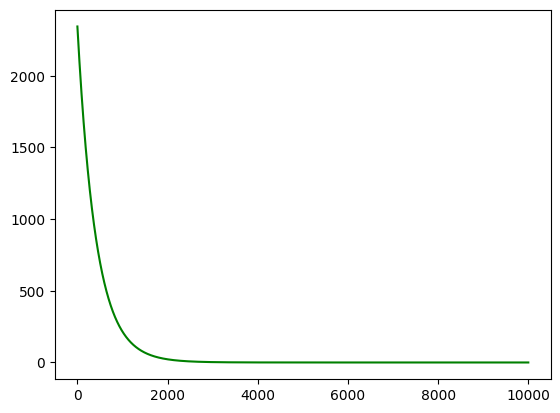

b_0 :  -7.93890218947237  b_1 :  -14.241204951393453
error after gradient descent: 5.861658712422073e-06


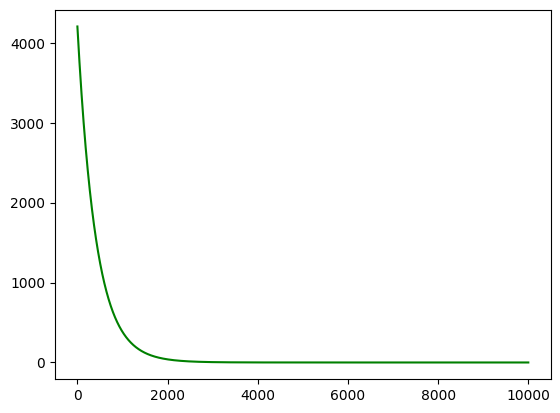

b_0 :  -10.088249838338776  b_1 :  0.08041079320870823
error after gradient descent: 4.786227924068899e-06


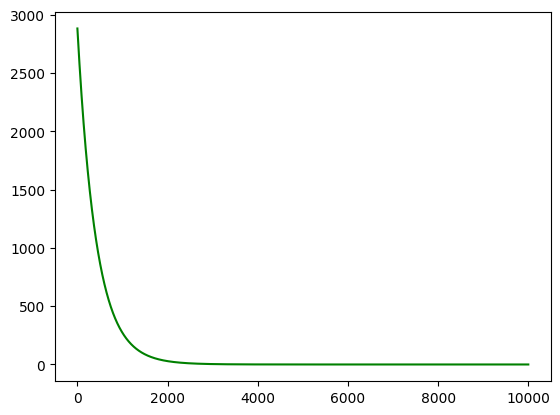

b_0 :  2.994988993556416  b_1 :  -4.504994868656668
error after gradient descent: 2.6237812961449105e-06


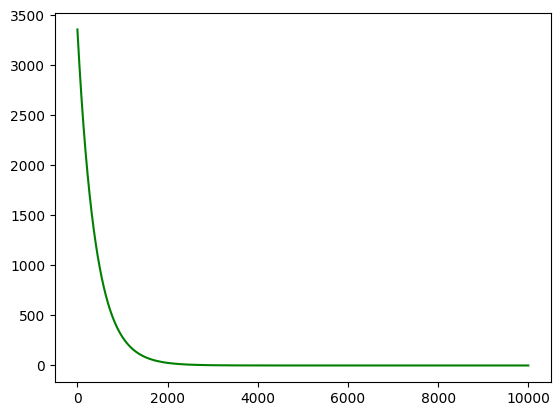

b_0 :  -9.67780171235556  b_1 :  5.805839728888986
error after gradient descent: 4.115109583347235e-06


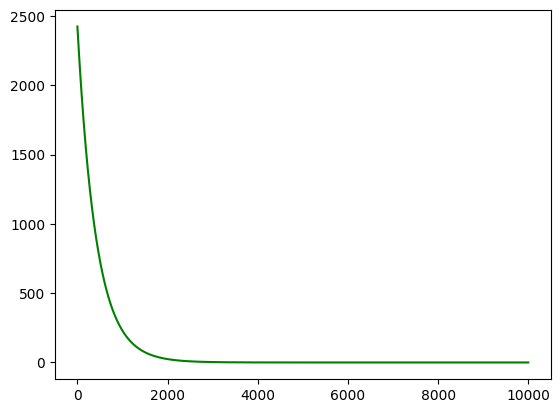

b_0 :  -0.7608454044123013  b_1 :  -6.8815556739147485
error after gradient descent: 3.5028826423068693e-06


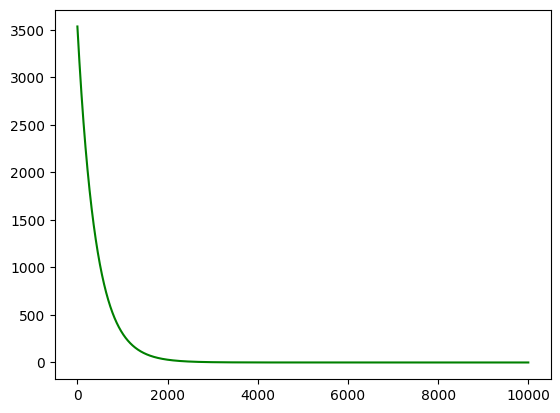

b_0 :  -3.3933113244256212  b_1 :  15.299797582354074
error after gradient descent: 2.1721912764148656e-06


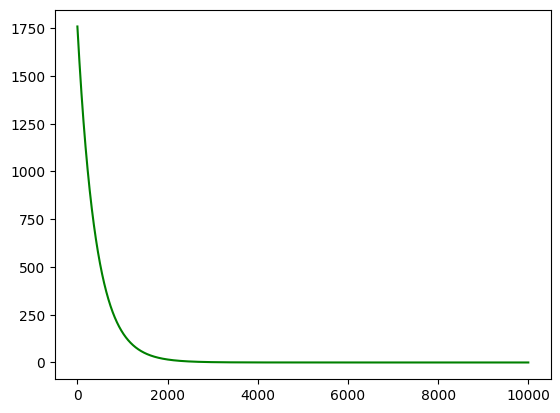

In [ ]:
for v in betas:
    print('b_0 : ', v[0], ' b_1 : ', v[1])
    lin_regr = Model(v[0], v[1])

    steps, errors = lin_regr.fit(x, y)
    J = lin_regr.error(x, y)
    print("error after gradient descent:", J)

    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.show()

Можем убедиться в том, что модель независимо от начальных коэффициентов сходится к оптимуму.

2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [ ]:
alphas = [10, 1, 0.1, 0.01, 0.001, 0.0001]

alpha :  10
error after gradient descent: nan


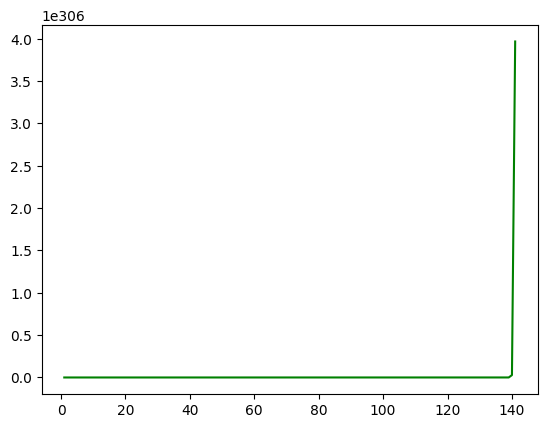

alpha :  1
error after gradient descent: 3.0967720910582346e-29


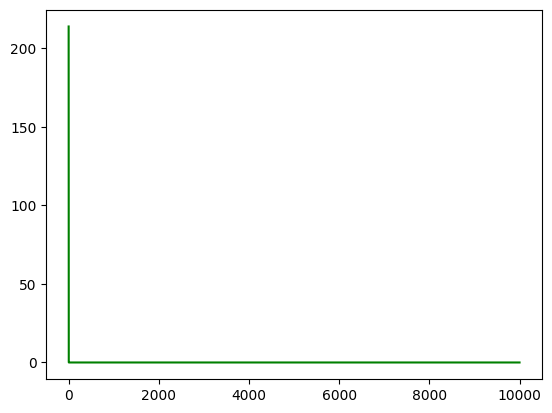

alpha :  0.1
error after gradient descent: 1.6583631164782415e-27


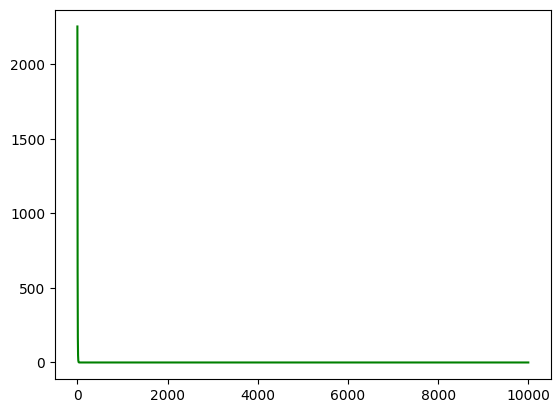

alpha :  0.01
error after gradient descent: 2.006036254818294e-25


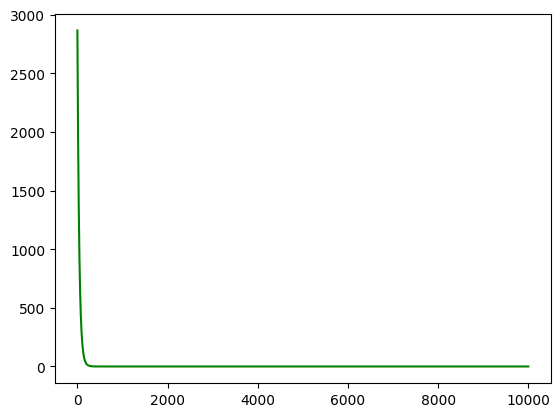

alpha :  0.001
error after gradient descent: 2.776975306057215e-06


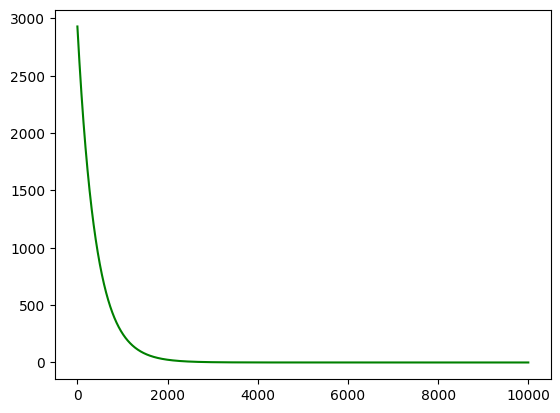

alpha :  0.0001
error after gradient descent: 253.47092542308437


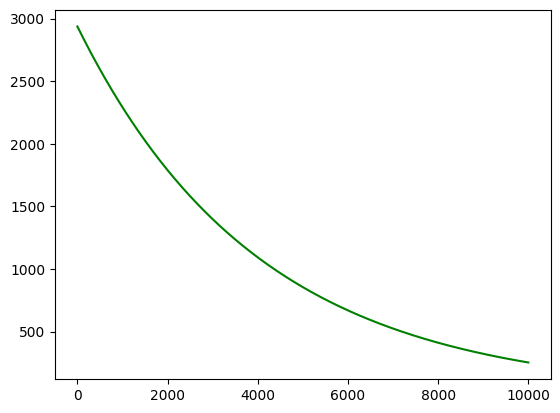

In [ ]:
for v in alphas:
    print('alpha : ',v)
    lin_regr = Model()

    steps, errors = lin_regr.fit(x, y, alpha = v)
    J = lin_regr.error(x, y)
    print("error after gradient descent:", J)

    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.show()

Заметим, что градиентный спуск расходится при alpha = `10`

3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0 = 0, b1 = 0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return np.array(np.sum(((self.predict(X) - Y)**2) / (2 * len(X)), axis=0)).item()
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10_000):
            dJ0 = np.array(np.sum(self.predict(X) - Y, axis=0)).item() /len(X)
            dJ1 = np.array(np.sum((self.predict(X) - Y) * X, axis=0)).item() /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
x_df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv').drop(columns = ['Unnamed: 0'])
y_df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv').drop(columns = ['Unnamed: 0'])

In [ ]:
x_df.head()

,0
0,1.462108
1,1.133769
2,-2.301539
3,1.744812
4,0.042214


In [ ]:
x_s = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y_s = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

In [ ]:
x_s.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [ ]:
lin_regr = Model()
steps, errors = lin_regr.fit(x_df, y_df)
J = lin_regr.error(x_df, y_df)
print("error after gradient descent:", J)

error after gradient descent: 2.7769753060572152e-06


In [ ]:
lin_regr = Model()
steps, errors = lin_regr.fit(x_s, y_s)
J = lin_regr.error(x_s, y_s)
print("error after gradient descent:", J)

error after gradient descent: 2.7769753060572152e-06


4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0 = 0, b1 = 0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return np.array(np.sum(((self.predict(X) - Y)**2) / (2 * len(X)), axis=0)).item()
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        eps = 0.000001
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = np.array(np.sum(self.predict(X) - Y, axis=0)).item() /len(X)
            dJ1 = np.array(np.sum((self.predict(X) - Y) * X, axis=0)).item() /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            if len(errors) != 0 and errors[-1] - new_err < eps:
                print('НЫAAAAAAAAA', errors[-1] - new_err)
                return steps, errors
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
lin_regr = Model()
steps, errors = lin_regr.fit(x_df, y_df)
J = lin_regr.error(x_df, y_df)
print("error after gradient descent:", J)

error after gradient descent: 0.039373213031129055


5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

In [ ]:
lin_regr = Model()
steps, errors = lin_regr.fit(x_df, y_df, max_steps = 100)
J = lin_regr.error(x_df, y_df)
print("error after gradient descent:", J)

error after gradient descent: 2291.882685525399


In [ ]:
lin_regr = Model()
steps, errors = lin_regr.fit(x_df, y_df, max_steps = 10_000)
J = lin_regr.error(x_df, y_df)
print("error after gradient descent:", J)

НЫAAAAAAAAA 9.999706380930213e-07
error after gradient descent: 0.0005244076717215662


6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0 = 0, b1 = 0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return np.array(np.sum(((self.predict(X) - Y)**2) / (2 * len(X)), axis=0)).item()
    def fit(self, X, Y, alpha=0.999, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = np.array(np.sum(self.predict(X) - Y, axis=0)).item() /len(X)
            dJ1 = np.array(np.sum((self.predict(X) - Y) * X, axis=0)).item() /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            if len(errors) != 0 and errors[-1] < new_err:
                alpha = alpha // 2
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
lin_regr = Model()
steps, errors = lin_regr.fit(x_df, y_df, max_steps = 10_000)
J = lin_regr.error(x_df, y_df)
print("error after gradient descent:", J)

error after gradient descent: 2.5874637691249185e-29


Для того, чтобы перезапустить градиентный спуск достаточно сделать рекурсивный вызов с новым парметром alpha.

7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0 = 0, b1 = 0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return np.array(np.sum(((self.predict(X) - Y)**2) / (2 * len(X)), axis=0)).item()
    def fit(self, X, Y, alpha=0.999, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = np.array(np.sum(self.predict(X) - Y, axis=0)).item() /len(X)
            dJ1 = np.array(np.sum((self.predict(X) - Y) * X, axis=0)).item() /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            if len(errors) != 0 and errors[-1] < new_err:
                alpha = alpha // 2
            steps.append(step)
            errors.append(new_err)
        return steps, errors
    def print(self, x, y):
        plt.figure()
        plt.plot(x, y, 'g')
        plt.xlim(right = 10_000, left = 0)
        plt.ylim(bottom = 0, top = 2000)
        plt.show()

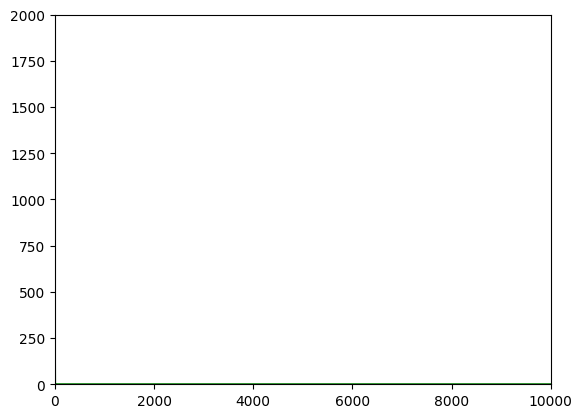

In [ ]:
lin_regr = Model()
steps, errors = lin_regr.fit(x_df, y_df, max_steps = 10_000)
lin_regr.print(steps, errors)